# Laboratory Four

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import pi
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

# Laboratory Four
## Phase Estimation for the S gate
Recall that the S gate rotates through twice the angle of the T gate, so we would expect an angle of 𝜃=2/8=1/4. The only change that you need to make to the program is to double the angle passed to the CU1 gate. Make the change to the program and run it. Observe the histogram that is produced. Does this agree with the expected value? Cut and paste the histogram into your report for this laboratory.

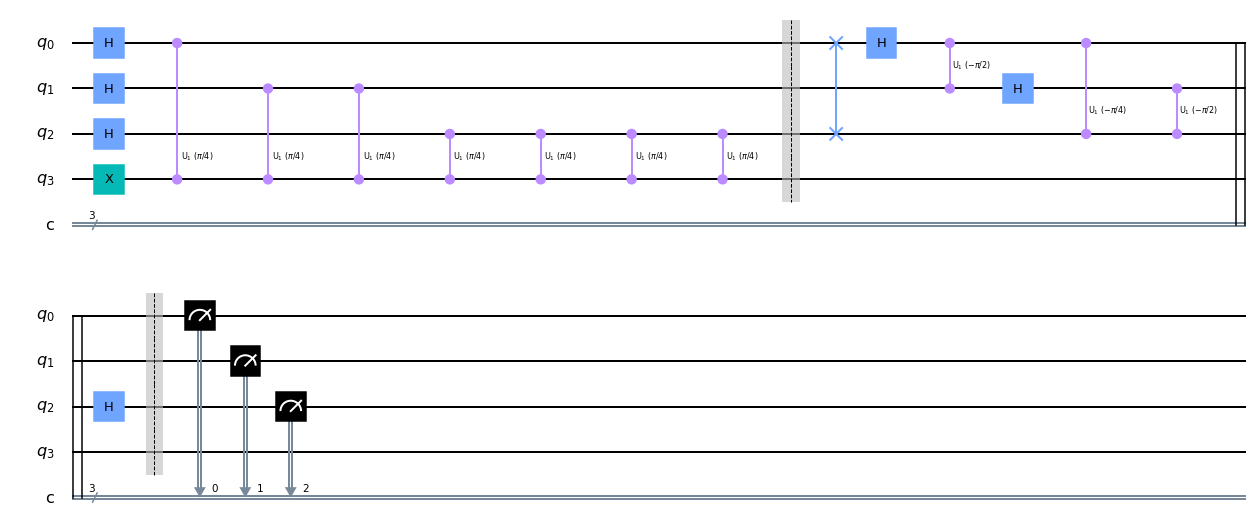

In [17]:
def qft_dagger(circ, n):
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-pi/float(2**(j-m)), m, j)
        circ.h(j)
        
qpe = QuantumCircuit(4,3)
qpe.x(3)
for qubit in range(3):
    qpe.h(qubit)
    
angle = 2*math.pi/5
repetitions = 1

for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(angle, counting_qubit, 3);
    repetitions *= 2

qpe.barrier()
qft_dagger(qpe, 3)
qpe.barrier()

for n in range(3):
    qpe.measure(n,n)

qpe.draw('mpl')


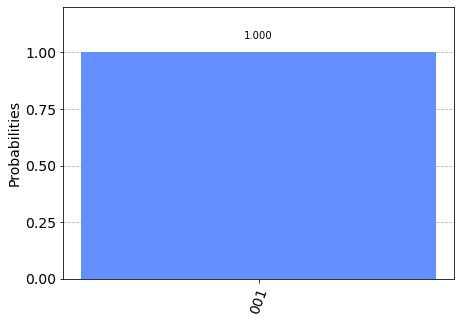

In [18]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

## Phase Estimation
The S gate produces an exact result, but that isn’t always the case. The textbook and the lecture include a program for estimating 𝜃=1/3 which cannot be accurately represented as a binary fraction. In this laboratory we will do the same with 𝜃=0.2 which again can’t be represented by a binary fraction. To do this you only need to make a simple change to the program. In the line where angle is computed replace the 3 by a 5. Observe the histogram that is produced by this circuit. Note that there are two tall bars adjacent to the correct value. Cut and paste the histogram into your report for this laboratory report.

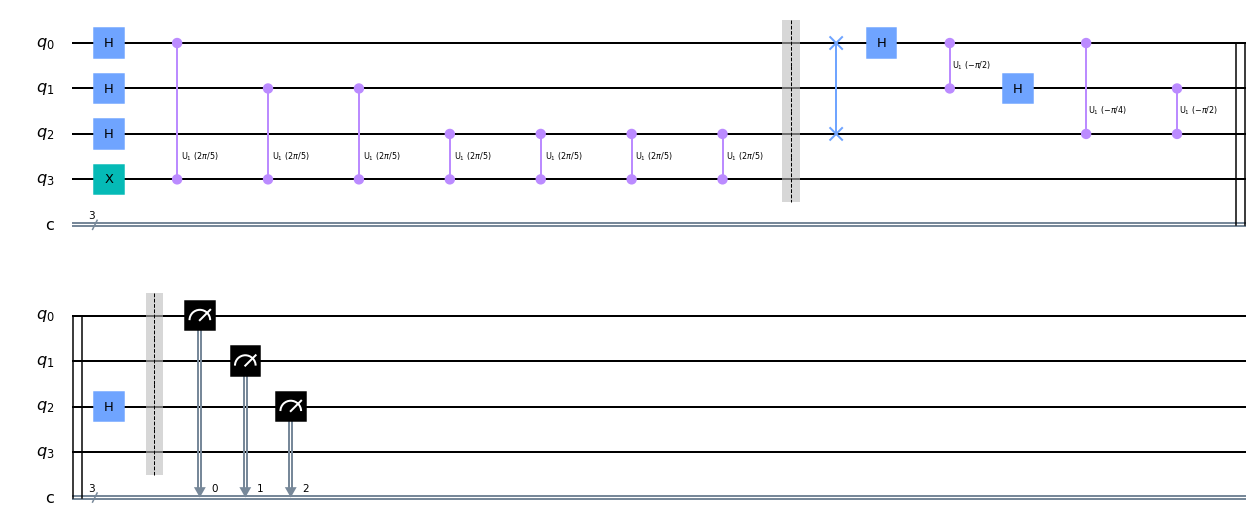

In [19]:
def qft_dagger(circ, n):
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-pi/float(2**(j-m)), m, j)
        circ.h(j)
        
qpe = QuantumCircuit(4,3)
qpe.x(3)
for qubit in range(3):
    qpe.h(qubit)
    
angle = 2*math.pi/5
repetitions = 1

for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(angle, counting_qubit, 3);
    repetitions *= 2

qpe.barrier()
qft_dagger(qpe, 3)
qpe.barrier()

for n in range(3):
    qpe.measure(n,n)

qpe.draw('mpl')

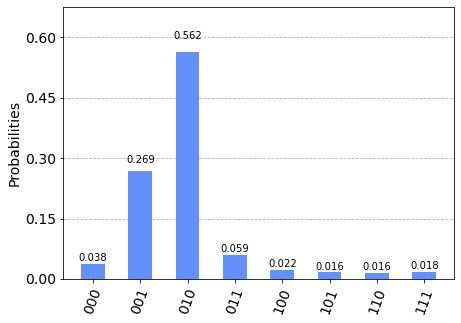

In [20]:
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)